In [1]:
# fetches the data
import acquire
# credentials file to access the data
import env
# Imports functions necessary to run visuals and hides unnecessary code
import wrangle_zillow

# coding 
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

# Acquiring Data

In [2]:
df = acquire.get_zillow_data()

### - Summary

In [3]:
wrangle_zillow.summarize(df)

--- Shape: (71858, 69)
--- Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71858 entries, 0 to 71857
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         71858 non-null  float64
 1   parcelid                      71858 non-null  int64  
 2   storytypeid                   47 non-null     float64
 3   typeconstructiontypeid        223 non-null    float64
 4   heatingorsystemtypeid         46680 non-null  float64
 5   buildingclasstypeid           0 non-null      object 
 6   architecturalstyletypeid      207 non-null    float64
 7   airconditioningtypeid         23069 non-null  float64
 8   id                            71858 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   71858 non-null  float64
 11  bedroomcnt                    71858 non-null  float64
 12  buildingqualitytypeid      

--- Nulls by Column: propertylandusetypeid               0
parcelid                            0
storytypeid                     71811
typeconstructiontypeid          71635
heatingorsystemtypeid           25178
buildingclasstypeid             71858
architecturalstyletypeid        71651
airconditioningtypeid           48789
id                                  0
basementsqft                    71811
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26795
calculatedbathnbr                 223
decktypeid                      71269
finishedfloor1squarefeet        66161
calculatedfinishedsquarefeet      156
finishedsquarefeet12              335
finishedsquarefeet13            71856
finishedsquarefeet15            71847
finishedsquarefeet50            66161
finishedsquarefeet6             71692
fips                                0
fireplacecnt                    63754
fullbathcnt                       223
garagecarcnt                 

### - Percent of missing values

In [4]:
wrangle_zillow.nulls_by_columns(df).sort_values(by= 'percent', ascending=False)

,count,percent
buildingclasstypeid,71858,1.000000
buildingclassdesc,71858,1.000000
finishedsquarefeet13,71856,0.999972
finishedsquarefeet15,71847,0.999847
storydesc,71811,0.999346
basementsqft,71811,0.999346
storytypeid,71811,0.999346
yardbuildingsqft26,71788,0.999026
finishedsquarefeet6,71692,0.997690
fireplaceflag,71686,0.997606


# Preparing Data

Fips dictionary:
- 6037.0 = Los Angeles,CA
- 6059.0 = Orange,CA
- 6111.0 = Ventura,CA

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

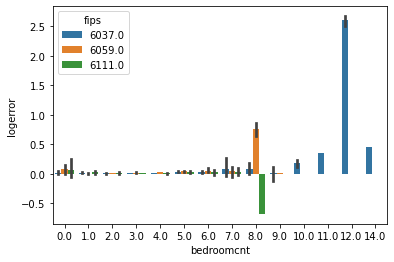

In [5]:
sns.barplot(x = 'bedroomcnt', y='logerror', hue = 'fips' ,data=df)

- it seems like there huge outliers that begin when the bedroom count is higher then 6

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

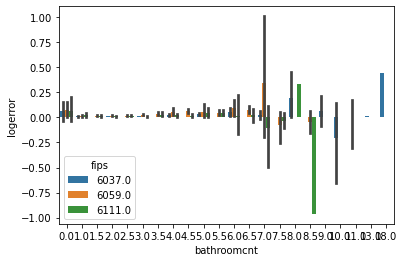

In [6]:
sns.barplot(x = 'bathroomcnt', y='logerror', hue = 'fips' ,data=df)

- it seems like there huge outliers that begin when the bathroom count is higher then 5

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

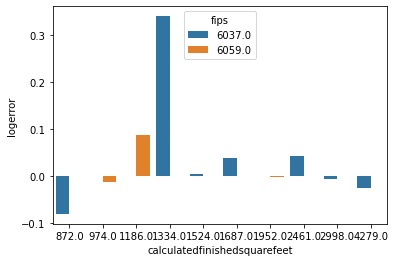

In [7]:
sns.barplot(x = 'calculatedfinishedsquarefeet', y='logerror', hue = 'fips' ,data=df.sample(10))

In [8]:
df.propertycountylandusecode.value_counts()

0100    26783
122     13067
010C     8838
0101     6413
34       4932
1111     3362
1        2398
010E     2053
1129     1380
1110     1025
012C      385
0104      369
01DC      212
01HC      137
010G       94
0103       91
010H       64
0108       57
010M       53
0700       50
0109       18
01HE       11
1116       10
73          9
1112        8
0113        6
0110        6
070D        5
0141        4
0105        3
0102        3
010V        3
0111        2
0130        2
0131        1
0133        1
0115        1
010L        1
0114        1
Name: propertycountylandusecode, dtype: int64

In [9]:
train = wrangle_zillow.get_exploration_data(df)

Before dropping nulls, 71858 rows, 69 cols
After dropping nulls. 56695 rows. 35 cols
Train: 38552 rows, 35 cols
Validate: 9638 rows, 35 cols
Test: 8505 rows, 35 cols


In [10]:
train

,propertylandusetypeid,parcelid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
41854,261.0,10917700,7.0,1075604,2.0,2.0,4.0,2.0,2122.0,2122.0,...,114895.0,2016.0,56723.0,1675.81,6.037144e+13,45268,0.056966,2017-06-09,Floor/Wall,Single Family Residential
65758,261.0,14435268,0.0,1757862,4.5,4.0,0.0,4.5,3953.0,3953.0,...,1125188.0,2016.0,571389.0,11335.50,6.059042e+13,70992,-0.310189,2017-08-28,none,Single Family Residential
62935,266.0,11096264,2.0,1031703,2.0,2.0,8.0,2.0,907.0,907.0,...,198162.0,2016.0,96078.0,2459.49,6.037113e+13,67952,-0.030675,2017-08-18,Central,Condominium
41182,261.0,12978348,7.0,1829762,1.0,3.0,4.0,1.0,1256.0,1256.0,...,318266.0,2016.0,205973.0,4074.43,6.037405e+13,44531,0.033915,2017-06-08,Floor/Wall,Single Family Residential
44077,261.0,12689873,2.0,1171679,5.0,4.0,11.0,5.0,4570.0,4570.0,...,1914031.0,2016.0,1429595.0,22330.56,6.037670e+13,47653,0.077013,2017-06-16,Central,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63216,261.0,12301140,2.0,320066,1.0,3.0,4.0,1.0,1308.0,1308.0,...,355000.0,2016.0,234000.0,4527.61,6.037536e+13,68263,0.033574,2017-08-18,Central,Single Family Residential
1100,261.0,14166104,0.0,444345,4.5,4.0,0.0,4.5,3162.0,3162.0,...,893126.0,2016.0,507082.0,10392.12,6.059022e+13,1181,0.062959,2017-01-06,none,Single Family Residential
957,261.0,10860028,2.0,2253801,3.0,4.0,6.0,3.0,1557.0,1557.0,...,644683.0,2016.0,496863.0,7829.22,6.037129e+13,1029,0.017751,2017-01-05,Central,Single Family Residential
15469,261.0,17082887,0.0,1014512,1.0,2.0,0.0,1.0,1152.0,1152.0,...,64678.0,2016.0,37564.0,772.38,6.111002e+13,16749,0.090198,2017-03-14,none,Single Family Residential


In [11]:
train.describe()

,propertylandusetypeid,parcelid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror
count,38552.000000,3.855200e+04,38552.000000,3.855200e+04,38552.000000,38552.000000,38552.000000,38552.000000,38552.000000,38552.000000,...,38552.000000,38552.000000,3.855200e+04,3.855200e+04,38552.0,3.855200e+04,38552.000000,3.855200e+04,38552.000000,38552.000000
mean,261.970767,1.267251e+07,2.736045,1.494572e+06,2.262191,3.074056,4.945450,2.262191,1776.633223,1776.633223,...,0.759935,1965.399824,1.870363e+05,4.896801e+05,2016.0,3.026437e+05,5979.485682,6.046839e+13,38832.131381,0.015923
std,1.977370,2.421141e+06,2.573896,8.600722e+05,0.964854,1.007373,3.177018,0.964854,945.744315,945.744315,...,0.428281,22.273510,2.260637e+05,6.468697e+05,0.0,4.751905e+05,7473.771948,2.067818e+11,22455.310236,0.160365
min,261.000000,1.071186e+07,0.000000,3.490000e+02,1.000000,0.000000,0.000000,1.000000,152.000000,152.000000,...,0.000000,1878.000000,1.810000e+02,9.242000e+03,2016.0,1.610000e+02,51.260000,6.037101e+13,1.000000,-4.655420
25%,261.000000,1.138129e+07,2.000000,7.513960e+05,2.000000,2.000000,4.000000,2.000000,1178.000000,1178.000000,...,1.000000,1951.000000,8.386600e+04,1.928950e+05,2016.0,7.171425e+04,2620.047500,6.037274e+13,19389.750000,-0.025348
50%,261.000000,1.224192e+07,2.000000,1.495003e+06,2.000000,3.000000,6.000000,2.000000,1535.000000,1535.000000,...,1.000000,1964.000000,1.334215e+05,3.458985e+05,2016.0,1.937015e+05,4339.380000,6.037551e+13,38925.500000,0.006411
75%,261.000000,1.306716e+07,2.000000,2.243004e+06,3.000000,4.000000,8.000000,3.000000,2098.000000,2098.000000,...,1.000000,1981.000000,2.119868e+05,5.640000e+05,2016.0,3.700000e+05,6759.307500,6.037920e+13,58177.000000,0.039372
max,266.000000,1.629608e+08,24.000000,2.982167e+06,13.000000,11.000000,12.000000,13.000000,21929.000000,21929.000000,...,3.000000,2016.000000,9.164901e+06,2.538125e+07,2016.0,2.233550e+07,288524.600000,6.111009e+13,77613.000000,3.175688


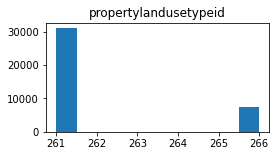

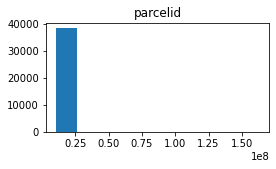

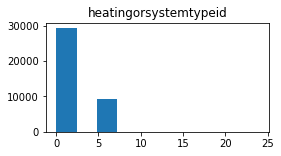

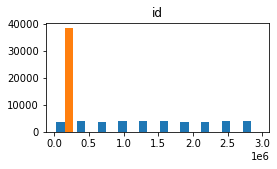

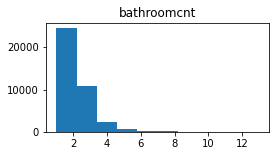

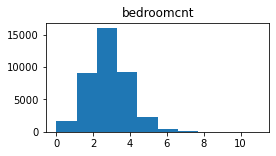

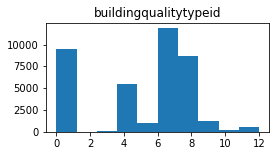

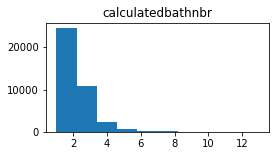

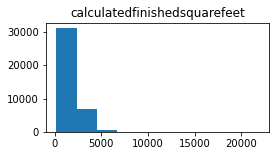

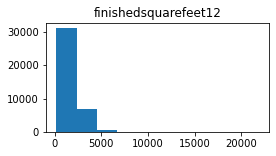

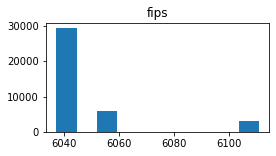

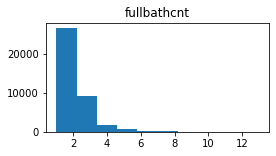

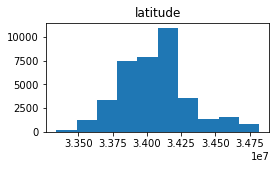

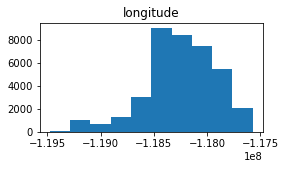

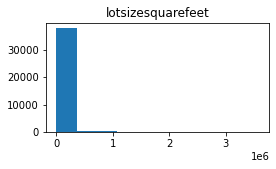

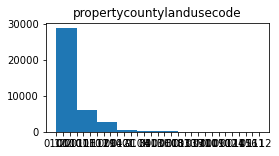

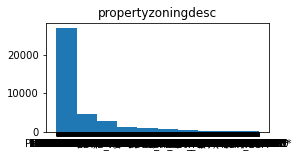

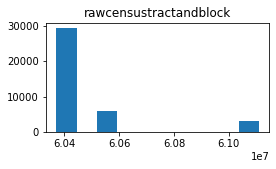

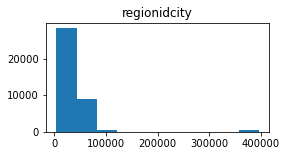

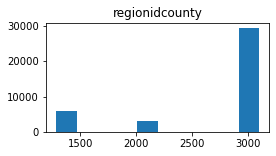

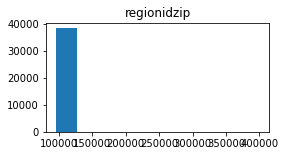

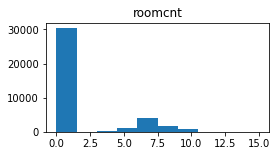

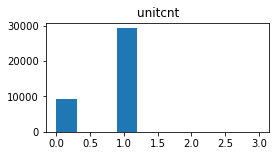

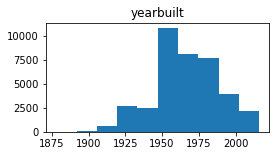

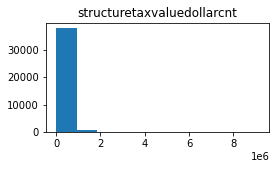

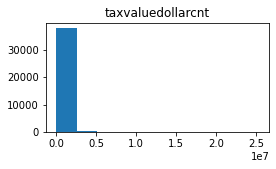

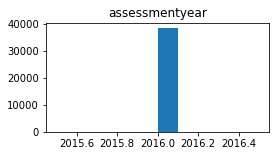

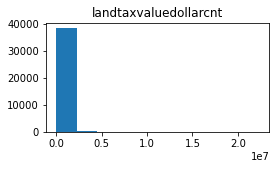

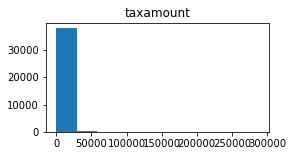

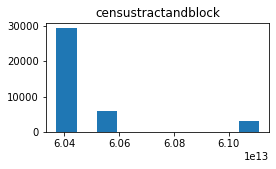

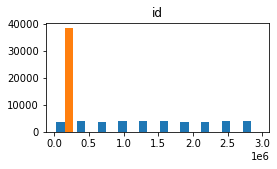

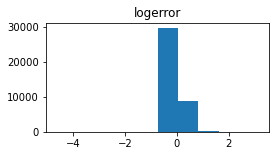

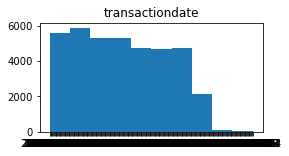

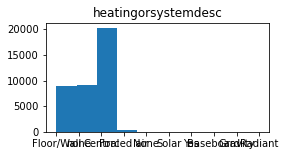

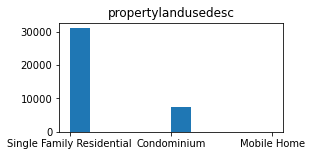

In [12]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

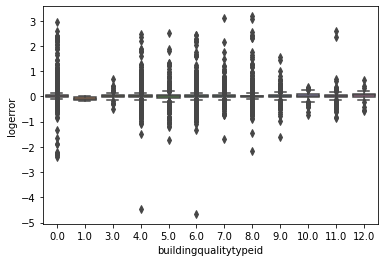

In [13]:
sns.boxplot(train.buildingqualitytypeid, train.logerror)
plt.title("")
plt.show()

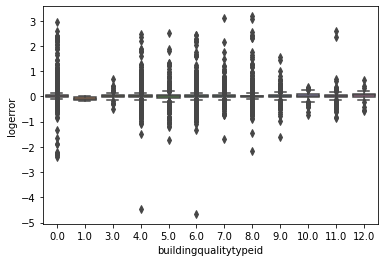

In [14]:
sns.boxplot(train.buildingqualitytypeid, train.logerror)
plt.title("")
plt.show()

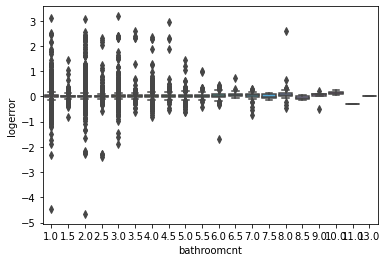

In [15]:
sns.boxplot(train.bathroomcnt, train.logerror)
plt.title("")
plt.show()

In [16]:
train.taxvaluedollarcnt.max()

25381250.0

In [17]:
# bin taxvaluecounts into bins

train['taxvaluedollarcnt_bin'] = pd.cut(train.taxvaluedollarcnt, [0, 500000, 1000000, 1500000,2000000, 2500000, 3000000, 10000000,20000000])


In [18]:
train.head()


,propertylandusetypeid,parcelid,heatingorsystemtypeid,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,taxvaluedollarcnt_bin
41854,261.0,10917700,7.0,1075604,2.0,2.0,4.0,2.0,2122.0,2122.0,...,2016.0,56723.0,1675.81,6.037144e+13,45268,0.056966,2017-06-09,Floor/Wall,Single Family Residential,"(0, 500000]"
65758,261.0,14435268,0.0,1757862,4.5,4.0,0.0,4.5,3953.0,3953.0,...,2016.0,571389.0,11335.50,6.059042e+13,70992,-0.310189,2017-08-28,none,Single Family Residential,"(1000000, 1500000]"
62935,266.0,11096264,2.0,1031703,2.0,2.0,8.0,2.0,907.0,907.0,...,2016.0,96078.0,2459.49,6.037113e+13,67952,-0.030675,2017-08-18,Central,Condominium,"(0, 500000]"
41182,261.0,12978348,7.0,1829762,1.0,3.0,4.0,1.0,1256.0,1256.0,...,2016.0,205973.0,4074.43,6.037405e+13,44531,0.033915,2017-06-08,Floor/Wall,Single Family Residential,"(0, 500000]"
44077,261.0,12689873,2.0,1171679,5.0,4.0,11.0,5.0,4570.0,4570.0,...,2016.0,1429595.0,22330.56,6.037670e+13,47653,0.077013,2017-06-16,Central,Single Family Residential,"(1500000, 2000000]"


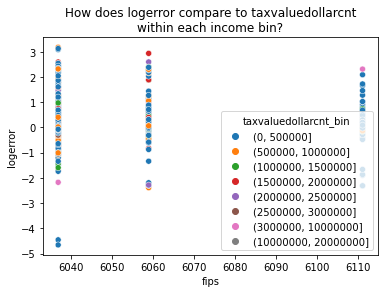

In [19]:
sns.scatterplot(x='fips', y='logerror',
               data=train, hue='taxvaluedollarcnt_bin')
plt.title("How does logerror compare to taxvaluedollarcnt\nwithin each income bin?")
plt.show()

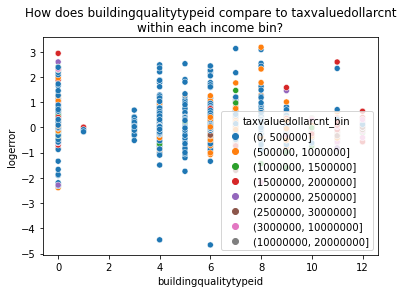

In [20]:
sns.scatterplot(x='buildingqualitytypeid', y='logerror',
               data=train, hue='taxvaluedollarcnt_bin')
plt.title("How does buildingqualitytypeid compare to taxvaluedollarcnt\nwithin each income bin?")
plt.show()

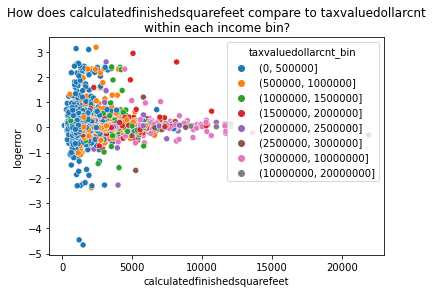

In [21]:
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror',
               data=train, hue='taxvaluedollarcnt_bin')
plt.title("How does calculatedfinishedsquarefeet compare to taxvaluedollarcnt\nwithin each income bin?")
plt.show()

In [22]:
train.propertylandusedesc.value_counts()

Single Family Residential    31061
Condominium                   7481
Mobile Home                     10
Name: propertylandusedesc, dtype: int64

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

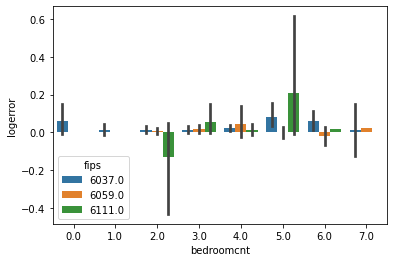

In [23]:
sns.barplot(x = 'bedroomcnt', y='logerror', hue = 'fips',data=train.sample(1000))

- bedrom count over 6 bedrooms in orange county is an out-lier and will have to be adressed